In [20]:

import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
import seaborn as sns


In [21]:
!pip install netcdf4

In [22]:
from datetime import datetime

import numpy as np
import pandas as pd

import netCDF4 as nc

In [23]:
## create NetCDF file
## THis is a gpt sample of making new NetCDF


newfile = nc.Dataset('newfile.nc', 'w', format='NETCDF4')

## define dimesions
long = newfile.createDimension('longitude', size=360)
lati = newfile.createDimension('latitude', size=180)
heights = newfile.createDimension('height', size=15)
times = newfile.createDimension('time', size=None)

## define variables for storing data
lon = newfile.createVariable('lon', 'f4', dimensions='longitude')
lat = newfile.createVariable('lat', 'f4', dimensions='latitude')
height = newfile.createVariable('height', 'f4', dimensions='height')
time = newfile.createVariable('times', 'S19', dimensions='time')
temps = newfile.createVariable('temperature', 'f4', dimensions=('longitude', 'latitude', 'height', 'time'))

## generate random values
temp = np.random.randint(-40, 40, size=(360, 180, 15, 24))

date_range = pd.date_range(datetime(2019, 6, 1, 0), datetime(2019, 6, 1, 23), freq='1h')

## add data to variables
lon[:] = np.arange(-180, 180)
lat[:] = np.arange(-90, 90)
height[:] = [10, 50, 100, 150, 200, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000]
temps[...] = temp
for i in range(24):
    time[i] = date_range[i].strftime('%Y-%m-%d %H:%M:%S')

## add attributes    
#add global attributes
newfile.title = 'Example of create NetCDF file using netcdf4-python'
newfile.start_time = time[i]
newfile.times = time.shape[0]
newfile.history = 'Created ' + datetime(2019, 6, 1, 0, 0, 0).strftime('%Y-%m-%d %H:%M%S')

#add local attributes to variable
lon.description = 'longitude, west is negative'
lon.units = 'degrees east'

lat.description = 'latitude, south is negative'
lat.units = 'degrees north'

time.description = 'time, unlimited dimension'
time.units = 'times since {0:s}'.format(time[0])

temps.description = 'temperature, random value generated by numpy'
temps.units = 'degree'

height.description = 'height, above ground level'
height.units = 'meters'    

## close file
newfile.close()

In [24]:
!pip install geos proj shapely

In [25]:
!pip install cartopy

In [26]:
!pip install palettable

In [27]:
# load library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
from palettable.colorbrewer.diverging import RdBu_11_r 
import netCDF4 as nc

In [1]:
import geopandas as gpd
from netCDF4 import Dataset
import numpy as np
from datetime import datetime

shapefile_path = 'data/test.shp'
gdf = gpd.read_file(shapefile_path)


gdf = gdf.to_crs("EPSG:4326")


gdf = gdf[gdf.is_valid]


polygons = gdf.geometry.apply(lambda poly: np.array(poly.exterior.coords) if poly.is_valid else np.array([]))

# Determine the maximum number of vertices
max_vertices = max(len(poly) for poly in polygons if len(poly) > 0)

type_data = gdf['Type'].values

# Create a new NetCDF file
nc_file = Dataset('shapefile_to_netcdf.nc', 'w', format='NETCDF4')

# Create dimensions
nc_file.createDimension('polygons', len(gdf))
nc_file.createDimension('vertices', max_vertices)
nc_file.createDimension('coord_dim', 2)  

# Create variables
polygon_var = nc_file.createVariable('polygons', 'f4', ('polygons', 'vertices', 'coord_dim'))
type_var = nc_file.createVariable('type', 'f4', ('polygons',))

# Add data to variables
for i, poly in enumerate(polygons):
    coords = np.zeros((max_vertices, 2))
    if len(poly) > 0:
        coords[:len(poly), :] = poly
    polygon_var[i, :, :] = coords

type_var[:] = type_data

# Add attributes
nc_file.description = 'Geospatial data with height attribute'
nc_file.history = 'Created ' + datetime.now().strftime("%Y-%m-%d %H:%M:%S")
nc_file.source = 'Generated from shapefile data'

polygon_var.units = 'degrees'
type_var.units = 't'

# Close the file
nc_file.close()

print("NetCDF file created successfully!")


NetCDF file created successfully!


In [2]:
!pip install netCDF4 matplotlib cartopy xarray

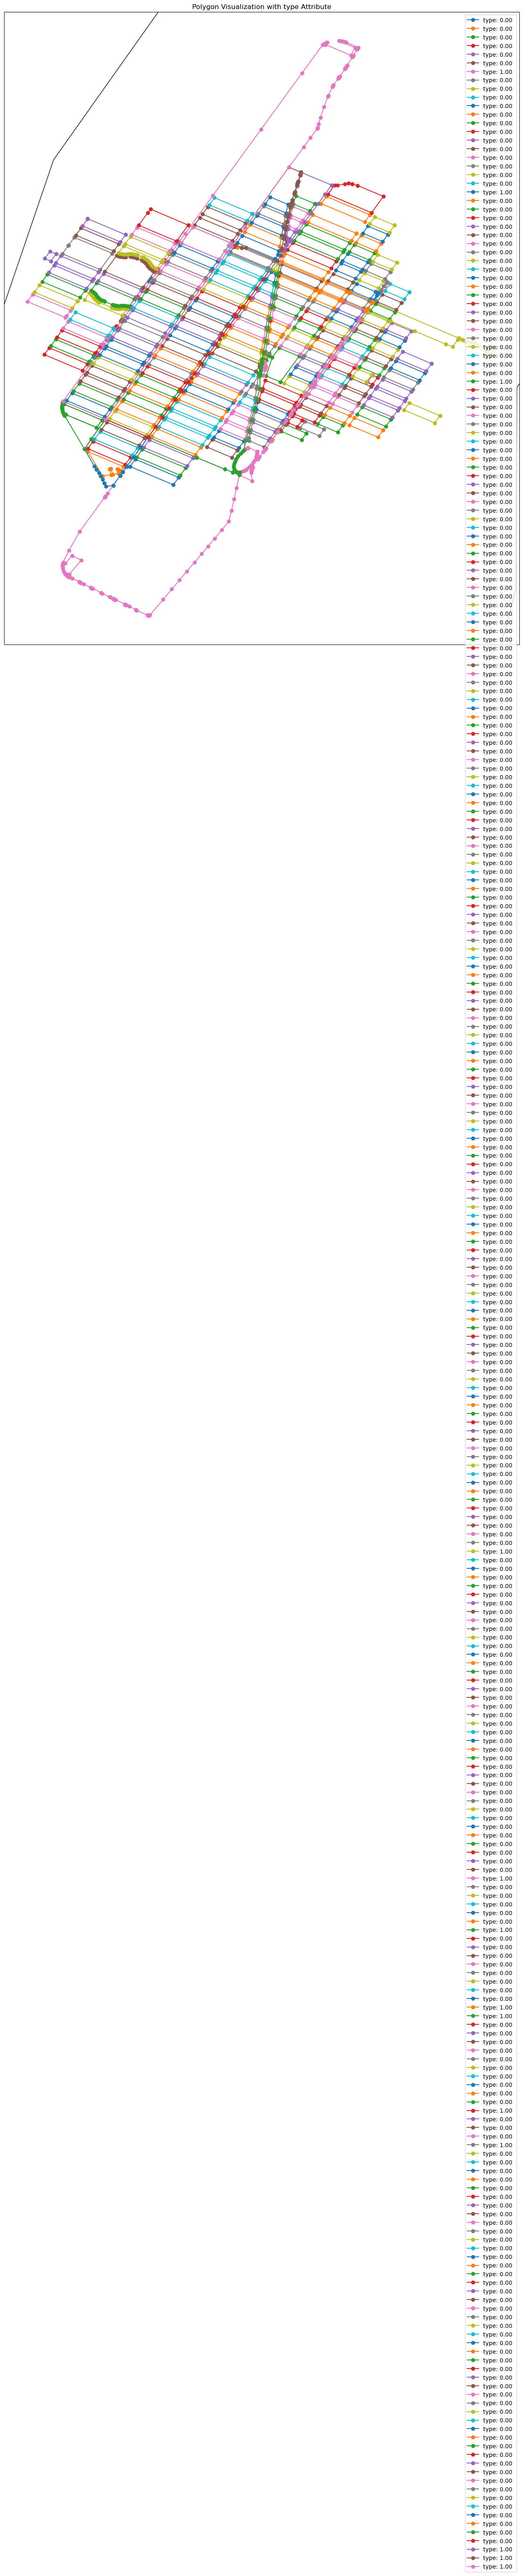

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset


nc_file = Dataset('shapefile_to_netcdf.nc', 'r')


latitudes = nc_file.variables['polygons'][:, :, 1]
longitudes = nc_file.variables['polygons'][:, :, 0]
type_data = nc_file.variables['type'][:]


fig, ax = plt.subplots(figsize = (20,20),subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.set_title('Polygon Visualization with type Attribute')


for i in range(len(type_data)):
    # Extract the non-zero coordinates
    lons = longitudes[i, :]
    lats = latitudes[i, :]
    non_zero_mask = lons != 0
    lons = lons[non_zero_mask]
    lats = lats[non_zero_mask]

    
    ax.plot(lons, lats, marker='o', transform=ccrs.PlateCarree(), label=f'type: {type_data[i]:.2f} ')

plt.legend()
plt.show()


nc_file.close()


In [6]:
from netCDF4 import Dataset

# Open the NetCDF file
nc_file = Dataset('shapefile_to_netcdf.nc', 'r')

# Print the global attributes
print("Global attributes:")
for attr in nc_file.ncattrs():
    print(f"{attr}: {getattr(nc_file, attr)}")

# Print the dimensions
print("\nDimensions:")
for dim_name, dim in nc_file.dimensions.items():
    print(f"{dim_name}: {len(dim)}")

# Print the variables and their attributes
print("\nVariables:")
for var_name, var in nc_file.variables.items():
    print(f"{var_name}: {var.dimensions}")
    for attr in var.ncattrs():
        print(f"  {attr}: {getattr(var, attr)}")
    print(f"  Data: {var[:]}")

# Close the NetCDF file
nc_file.close()


Global attributes:
description: Geospatial data with height attribute
history: Created 2024-06-05 15:00:59
source: Generated from shapefile data

Dimensions:
polygons: 297
vertices: 194
coord_dim: 2

Variables:
polygons: ('polygons', 'vertices', 'coord_dim')
  units: degrees
  Data: [[[-73.994804  40.73467 ]
  [-73.99516   40.73418 ]
  [-73.998055  40.7354  ]
  ...
  [  0.         0.      ]
  [  0.         0.      ]
  [  0.         0.      ]]

 [[-73.998474  40.735382]
  [-73.99868   40.735104]
  [-73.9987    40.735115]
  ...
  [  0.         0.      ]
  [  0.         0.      ]
  [  0.         0.      ]]

 [[-73.99434   40.73531 ]
  [-73.9947    40.73481 ]
  [-73.9976    40.73603 ]
  ...
  [  0.         0.      ]
  [  0.         0.      ]
  [  0.         0.      ]]

 ...

 [[-73.9846    40.754177]
  [-73.98505   40.753555]
  [-73.98549   40.752934]
  ...
  [  0.         0.      ]
  [  0.         0.      ]
  [  0.         0.      ]]

 [[-73.98664   40.755035]
  [-73.98667   40.754944]
  

NetCDF file created successfully!


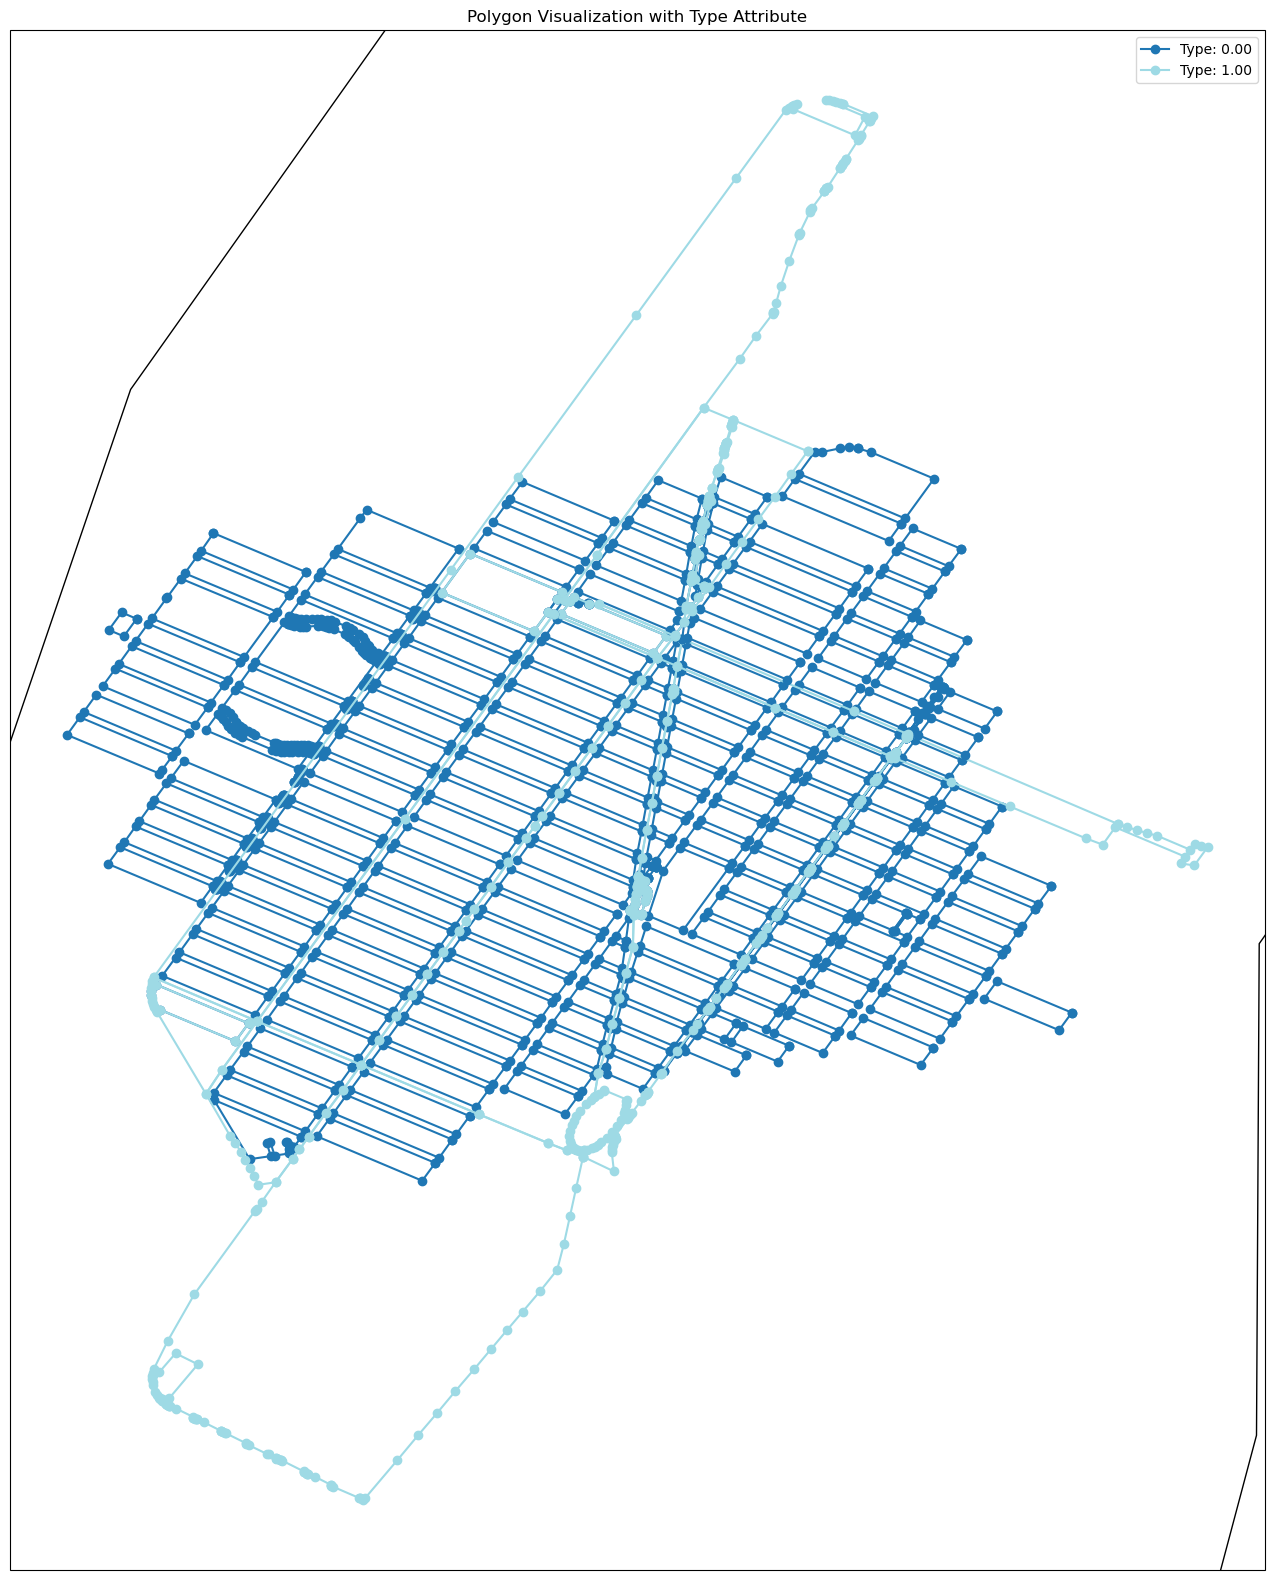

In [7]:
import geopandas as gpd
from netCDF4 import Dataset
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap

# Reading shapefile and creating NetCDF file
shapefile_path = 'data/test.shp'
gdf = gpd.read_file(shapefile_path)
gdf = gdf.to_crs("EPSG:4326")
gdf = gdf[gdf.is_valid]
polygons = gdf.geometry.apply(lambda poly: np.array(poly.exterior.coords) if poly.is_valid else np.array([]))
max_vertices = max(len(poly) for poly in polygons if len(poly) > 0)
type_data = gdf['Type'].values
unique_types = np.unique(type_data)

nc_file = Dataset('shapefile_to_netcdf.nc', 'w', format='NETCDF4')
nc_file.createDimension('polygons', len(gdf))
nc_file.createDimension('vertices', max_vertices)
nc_file.createDimension('coord_dim', 2)
polygon_var = nc_file.createVariable('polygons', 'f4', ('polygons', 'vertices', 'coord_dim'))
type_var = nc_file.createVariable('type', 'f4', ('polygons',))

for i, poly in enumerate(polygons):
    coords = np.zeros((max_vertices, 2))
    if len(poly) > 0:
        coords[:len(poly), :] = poly
    polygon_var[i, :, :] = coords
type_var[:] = type_data

nc_file.description = 'Geospatial data with type attribute'
nc_file.history = 'Created ' + datetime.now().strftime("%Y-%m-%d %H:%M:%S")
nc_file.source = 'Generated from shapefile data'
polygon_var.units = 'degrees'

nc_file.close()

print("NetCDF file created successfully!")

nc_file = Dataset('shapefile_to_netcdf.nc', 'r')
latitudes = nc_file.variables['polygons'][:, :, 1]
longitudes = nc_file.variables['polygons'][:, :, 0]
type_data = nc_file.variables['type'][:]

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.set_title('Polygon Visualization with Type Attribute')

cmap = plt.get_cmap('tab20', len(unique_types))  # Use a colormap with enough unique colors
type_to_color = {type_name: cmap(i) for i, type_name in enumerate(unique_types)}

for i in range(len(type_data)):
    lons = longitudes[i, :]
    lats = latitudes[i, :]
    non_zero_mask = lons != 0
    lons = lons[non_zero_mask]
    lats = lats[non_zero_mask]
    color = type_to_color[type_data[i]]
    ax.plot(lons, lats, marker='o', transform=ccrs.PlateCarree(), color=color, label=f'Type: {type_data[i]:.2f}')


handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()

nc_file.close()


In [8]:
import geopandas as gpd
from netCDF4 import Dataset
import numpy as np
from datetime import datetime

shapefile_path = 'data/test.shp'
gdf = gpd.read_file(shapefile_path)
gdf = gdf.to_crs("EPSG:4326")
gdf = gdf[gdf.is_valid]
polygons = gdf.geometry.apply(lambda poly: np.array(poly.exterior.coords) if poly.is_valid else np.array([]))
max_vertices = max(len(poly) for poly in polygons if len(poly) > 0)
type_data = gdf['Type'].values

depths = {1: 10, 0: 20}
depth_data = np.array([depths[t] for t in type_data])

# Create a depth variable
nc_file = Dataset('shapefile_to_netcdfwithdepth.nc', 'w', format='NETCDF4')
nc_file.createDimension('polygons', len(gdf))
nc_file.createDimension('vertices', max_vertices)
nc_file.createDimension('coord_dim', 2)
polygon_var = nc_file.createVariable('polygons', 'f4', ('polygons', 'vertices', 'coord_dim'))
type_var = nc_file.createVariable('type', 'f4', ('polygons',))
depth_var = nc_file.createVariable('depth', 'f4', ('polygons',))

for i, poly in enumerate(polygons):
    coords = np.zeros((max_vertices, 2))
    if len(poly) > 0:
        coords[:len(poly), :] = poly
    polygon_var[i, :, :] = coords
type_var[:] = type_data
depth_var[:] = depth_data

nc_file.description = 'Geospatial data with depth attribute'
nc_file.history = 'Created ' + datetime.now().strftime("%Y-%m-%d %H:%M:%S")
nc_file.source = 'Generated from shapefile data'
polygon_var.units = 'degrees'
depth_var.units = 'meters'

nc_file.close()

print("NetCDF file created successfully!")


NetCDF file created successfully!


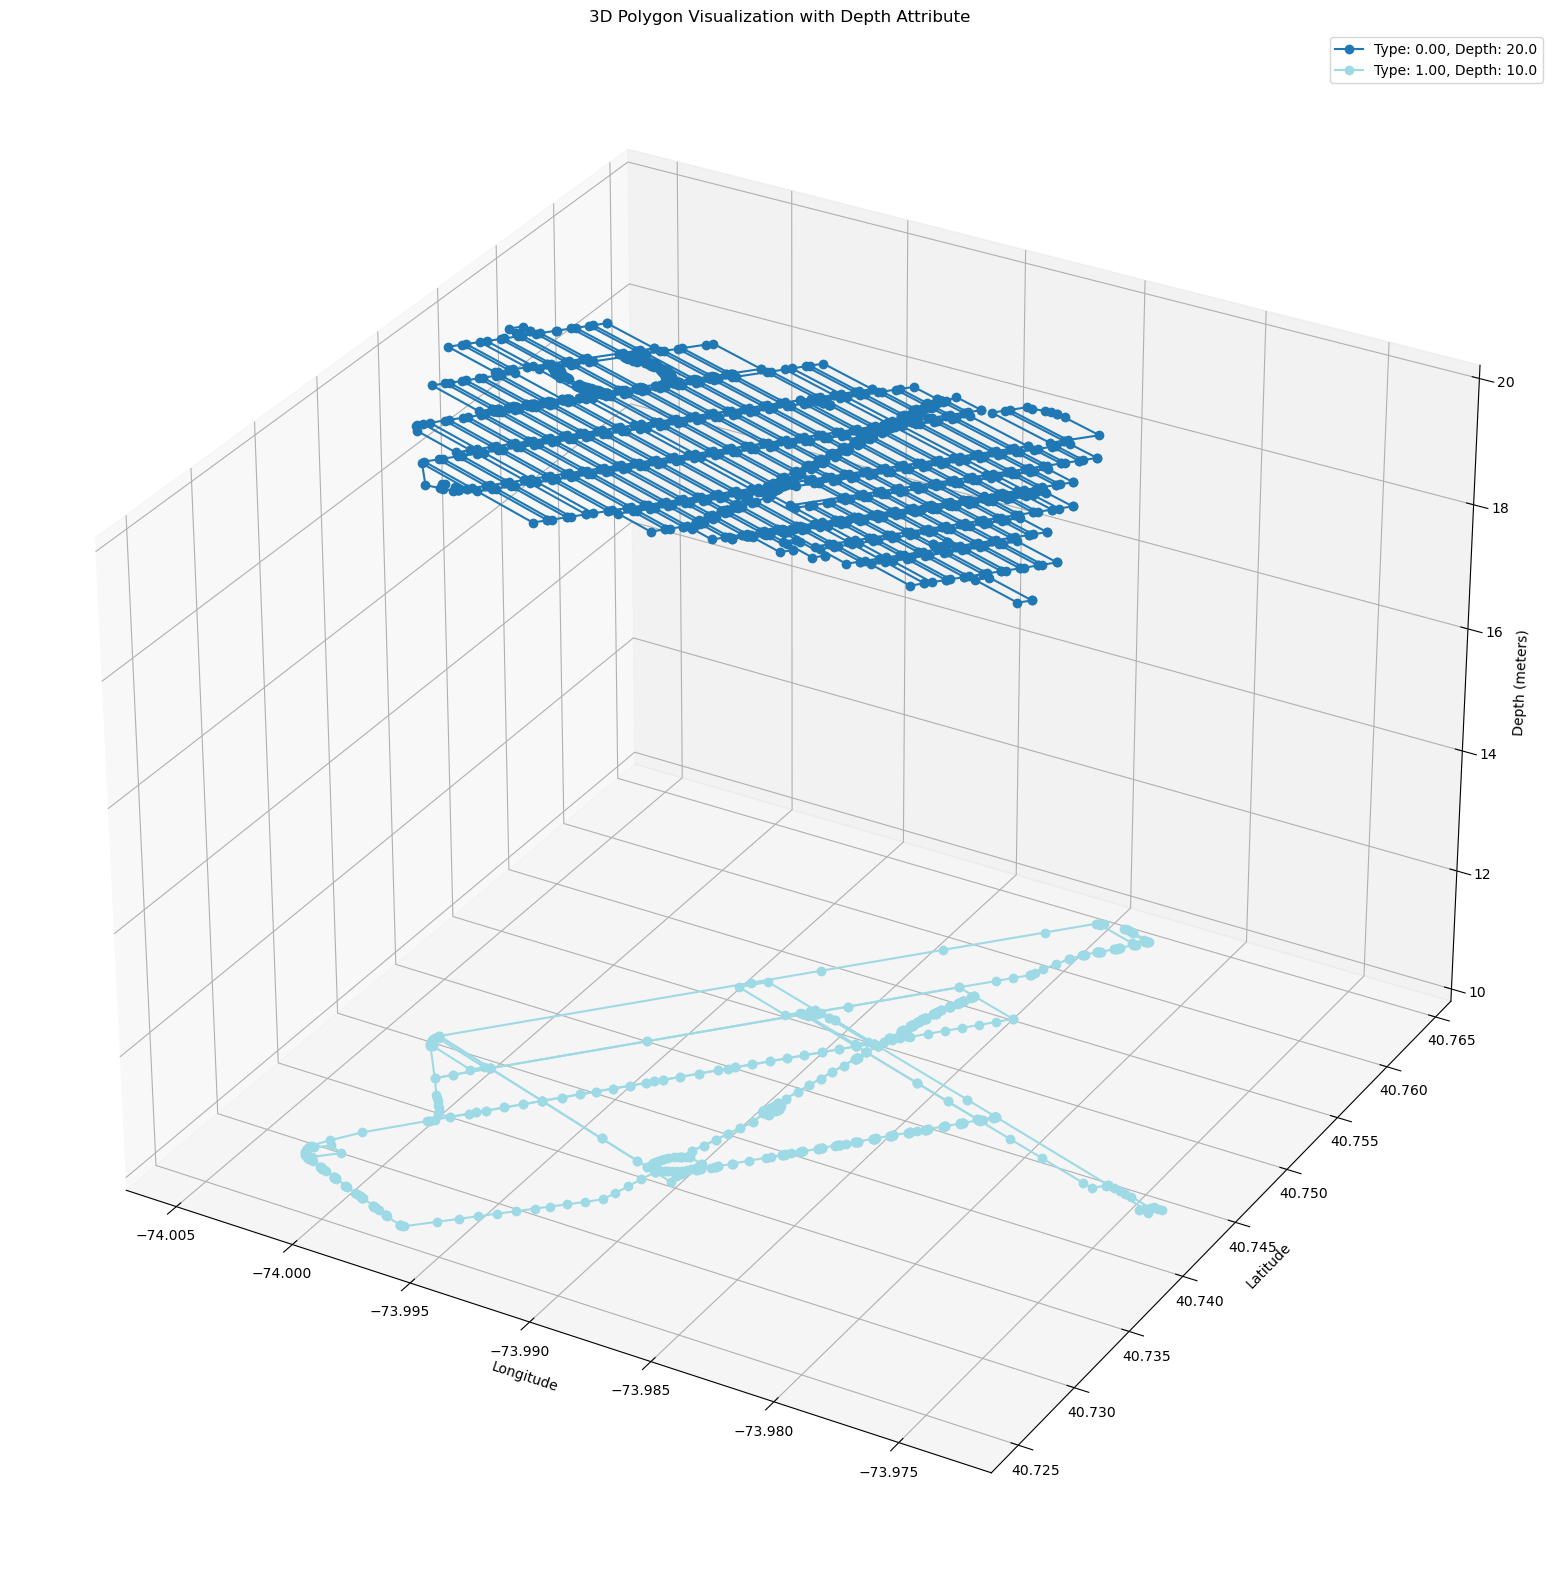

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cartopy.crs as ccrs
from netCDF4 import Dataset

nc_file = Dataset('shapefile_to_netcdfwithdepth.nc', 'r')
latitudes = nc_file.variables['polygons'][:, :, 1]
longitudes = nc_file.variables['polygons'][:, :, 0]
type_data = nc_file.variables['type'][:]
depth_data = nc_file.variables['depth'][:]

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

ax.set_title('3D Polygon Visualization with Depth Attribute')

unique_types = np.unique(type_data)
cmap = plt.get_cmap('tab20', len(unique_types))
type_to_color = {type_name: cmap(i) for i, type_name in enumerate(unique_types)}

for i in range(len(type_data)):
    lons = longitudes[i, :]
    lats = latitudes[i, :]
    depth = depth_data[i]
    non_zero_mask = lons != 0
    lons = lons[non_zero_mask]
    lats = lats[non_zero_mask]
    zs = np.full_like(lons, depth)
    color = type_to_color[type_data[i]]
    ax.plot(lons, lats, zs, marker='o', color=color, label=f'Type: {type_data[i]:.2f}, Depth: {depth}')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (meters)')

plt.show()

nc_file.close()


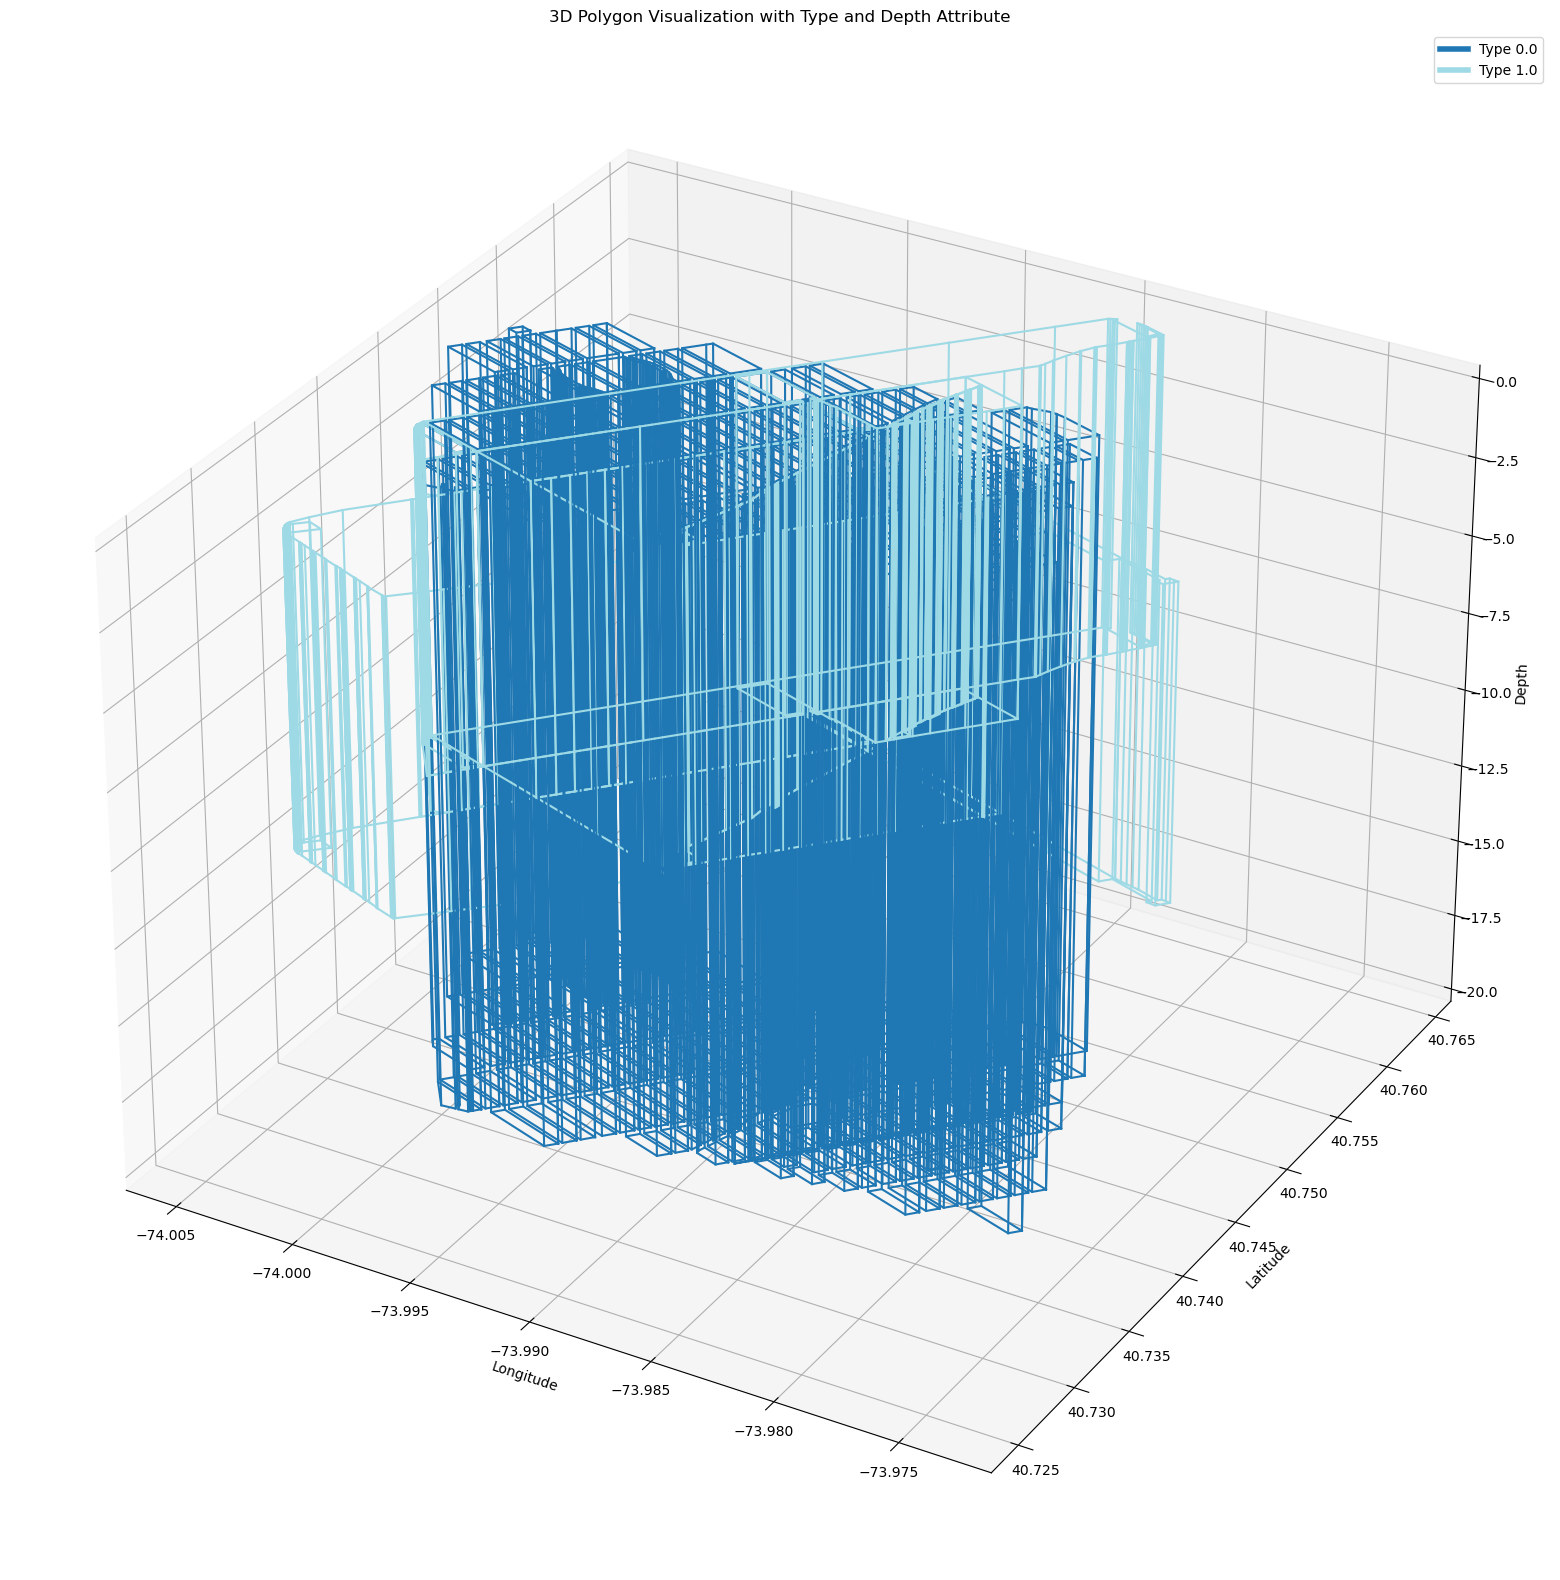

In [13]:
nc_file = Dataset('shapefile_to_netcdfwithdepth.nc', 'r')
latitudes = nc_file.variables['polygons'][:, :, 1]
longitudes = nc_file.variables['polygons'][:, :, 0]
type_data = nc_file.variables['type'][:]
depth_data = nc_file.variables['depth'][:]

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D Polygon Visualization with Type and Depth Attribute')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth')

cmap = plt.get_cmap('tab20', len(unique_types))
type_to_color = {type_name: cmap(i) for i, type_name in enumerate(unique_types)}

# Plot each polygon as a cylinder with depth
for i in range(len(type_data)):
    lons = longitudes[i, :]
    lats = latitudes[i, :]
    non_zero_mask = lons != 0
    lons = lons[non_zero_mask]
    lats = lats[non_zero_mask]
    depth = depth_data[i]
    color = type_to_color[type_data[i]]

    # Create a 3D cylinder by plotting the polygon at different depths
    for z in [0, -depth]:
        ax.plot(lons, lats, z, color=color)
   
    for j in range(len(lons)):
        ax.plot([lons[j], lons[j]], [lats[j], lats[j]], [0, -depth], color=color)

handles, labels = [], []
for type_name, color in type_to_color.items():
    handles.append(plt.Line2D([0], [0], color=color, lw=4))
    labels.append(f'Type {type_name}')
ax.legend(handles, labels)

plt.show()

nc_file.close()

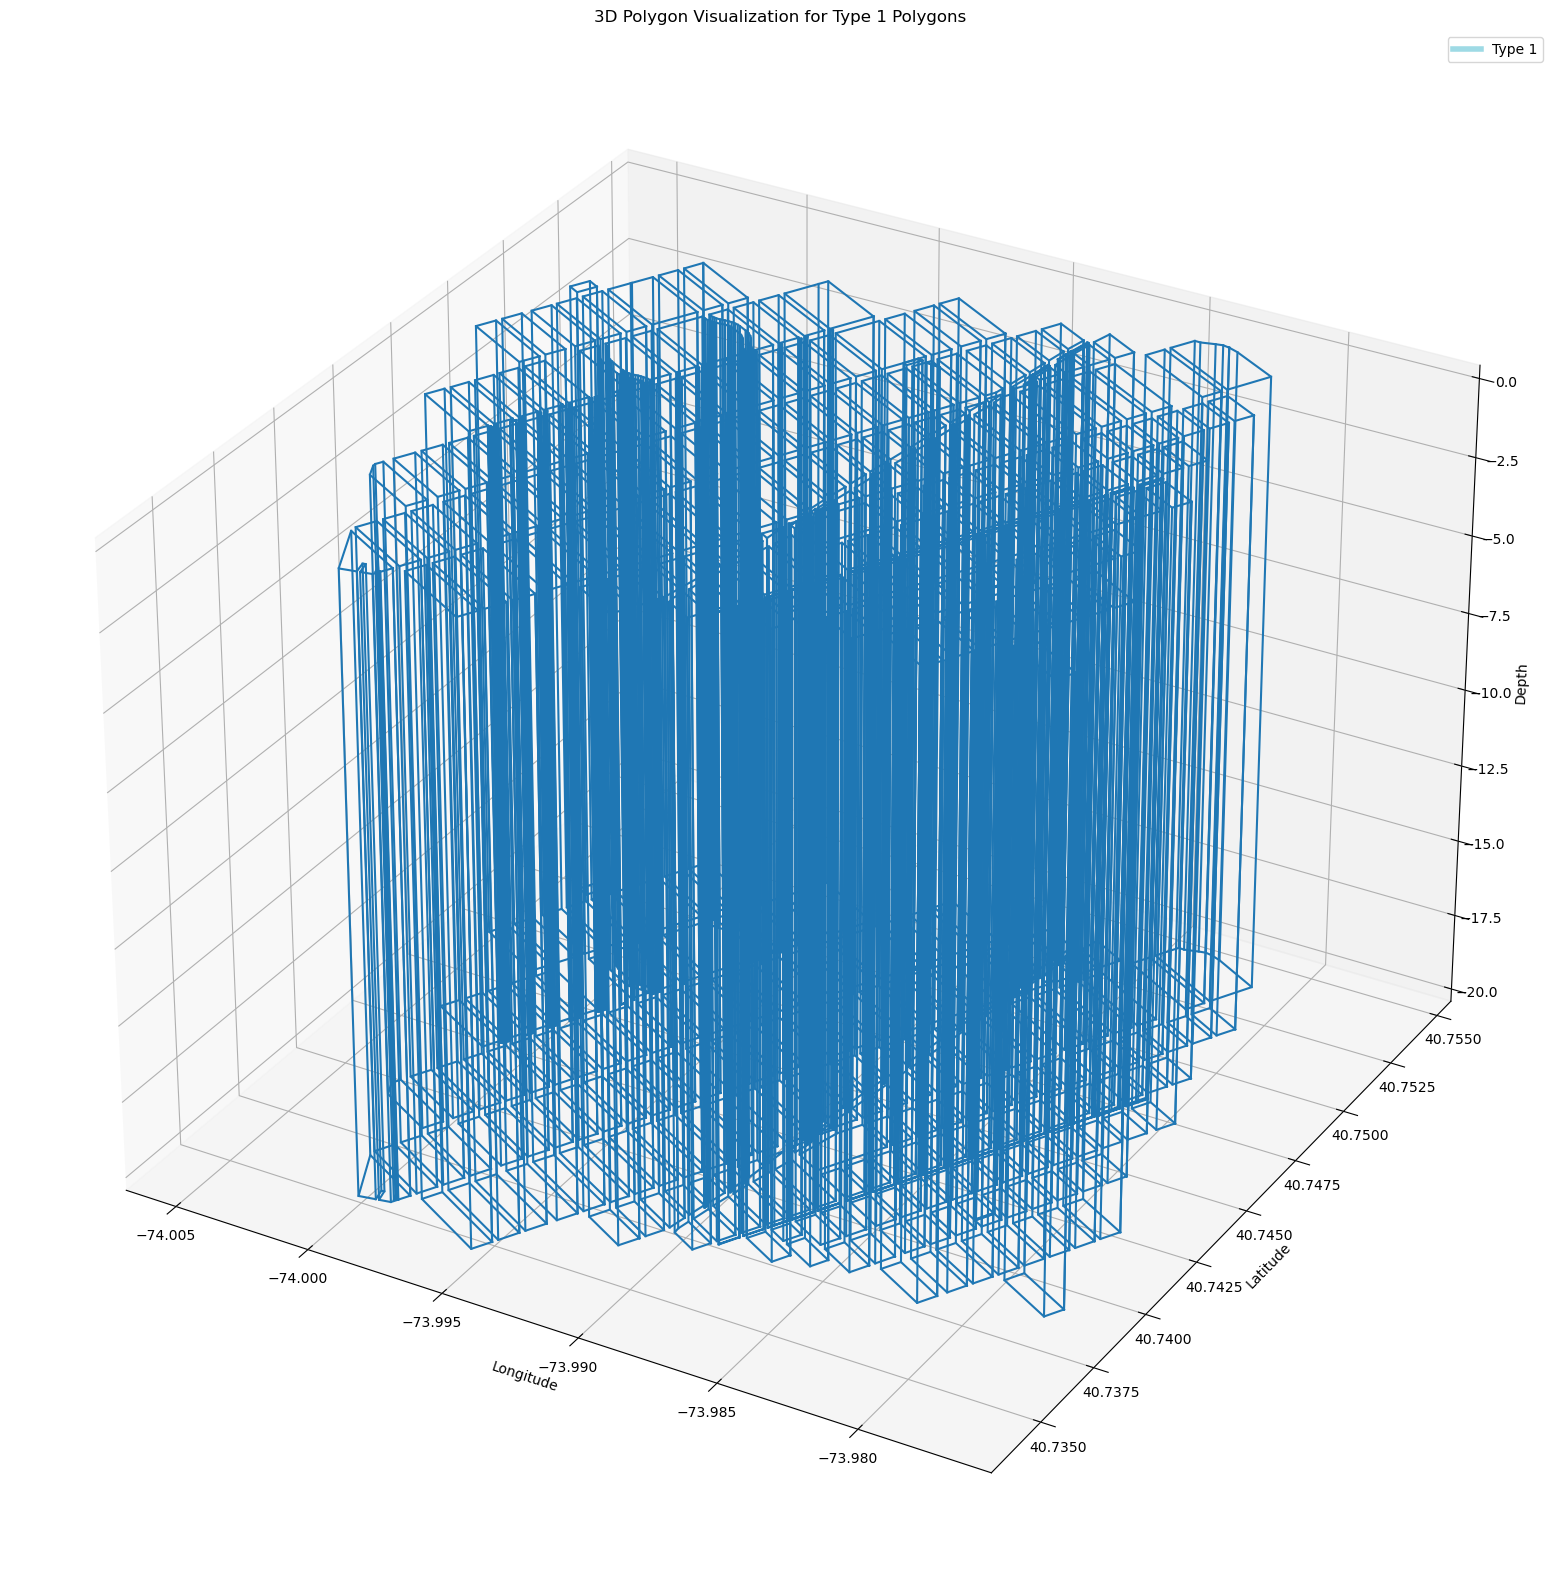

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from netCDF4 import Dataset

nc_file = Dataset('shapefile_to_netcdfwithdepth.nc', 'r')
latitudes = nc_file.variables['polygons'][:, :, 1]
longitudes = nc_file.variables['polygons'][:, :, 0]
type_data = nc_file.variables['type'][:]
depth_data = nc_file.variables['depth'][:]

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D Polygon Visualization for Type 1 Polygons')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth')

cmap = plt.get_cmap('tab20', len(unique_types))
type_to_color = {type_name: cmap(i) for i, type_name in enumerate(unique_types)}

# Plot each polygon as a cylinder with depth for type 1 polygons only
for i in range(len(type_data)):
    if type_data[i] == 0:  
        lons = longitudes[i, :]
        lats = latitudes[i, :]
        non_zero_mask = lons != 0
        lons = lons[non_zero_mask]
        lats = lats[non_zero_mask]
        depth = depth_data[i]
        color = type_to_color[type_data[i]]

        for z in [0, -depth]:
            ax.plot(lons, lats, z, color=color)
        
        for j in range(len(lons)):
            ax.plot([lons[j], lons[j]], [lats[j], lats[j]], [0, -depth], color=color)

handles, labels = [plt.Line2D([0], [0], color=type_to_color[1], lw=4)], ['Type 1']
ax.legend(handles, labels)

plt.show()

nc_file.close()


In [ ]:
## Below is problematic code, and i don't know how to fix lol, i combine them and it becomes emmmmm trash 

In [10]:
import geopandas as gpd
from netCDF4 import Dataset
import numpy as np
from datetime import datetime

shapefile_path = 'data/test.shp'
gdf = gpd.read_file(shapefile_path)

# Reproject to EPSG:4326
gdf = gdf.to_crs("EPSG:4326")

# Ensure valid geometries
gdf = gdf[gdf.is_valid]

# Group polygons by type
grouped = gdf.groupby('Type')

# Find the maximum number of vertices among all polygons
max_vertices = max(len(poly.exterior.coords) for poly in gdf.geometry if poly.is_valid)

# Create a new NetCDF file
nc_file = Dataset('shapefile_to_netcdfcombine.nc', 'w', format='NETCDF4')

# Create dimensions
nc_file.createDimension('types', len(grouped))
nc_file.createDimension('polygons', max(len(group) for _, group in grouped))
nc_file.createDimension('vertices', max_vertices)
nc_file.createDimension('coord_dim', 2)  # For x and y coordinates

# Create variables
polygon_var = nc_file.createVariable('polygons', 'f4', ('types', 'polygons', 'vertices', 'coord_dim'))
type_var = nc_file.createVariable('type', 'i4', ('types',))

# Add data to variables
for i, (type_name, group) in enumerate(grouped):
    type_var[i] = type_name
    for j, poly in enumerate(group.geometry):
        coords = np.zeros((max_vertices, 2))
        if poly.is_valid:
            poly_coords = np.array(poly.exterior.coords)
            coords[:len(poly_coords), :] = poly_coords
        polygon_var[i, j, :, :] = coords

# Add attributes
nc_file.description = 'Geospatial data grouped by type'
nc_file.history = 'Created ' + datetime.now().strftime("%Y-%m-%d %H:%M:%S")
nc_file.source = 'Generated from shapefile data'

polygon_var.units = 'degrees'

# Close the file
nc_file.close()

print("NetCDF file created successfully!")


NetCDF file created successfully!


In [11]:
from netCDF4 import Dataset

# Open the NetCDF file
nc_file = Dataset('shapefile_to_netcdfcombine.nc', 'r')

# Print the global attributes
print("Global attributes:")
for attr in nc_file.ncattrs():
    print(f"{attr}: {getattr(nc_file, attr)}")

# Print the dimensions
print("\nDimensions:")
for dim_name, dim in nc_file.dimensions.items():
    print(f"{dim_name}: {len(dim)}")

# Print the variables and their attributes
print("\nVariables:")
for var_name, var in nc_file.variables.items():
    print(f"{var_name}: {var.dimensions}")
    for attr in var.ncattrs():
        print(f"  {attr}: {getattr(var, attr)}")
    print(f"  Data: {var[:]}")

# Close the NetCDF file
nc_file.close()


Global attributes:
description: Geospatial data grouped by type
history: Created 2024-06-05 15:16:40
source: Generated from shapefile data

Dimensions:
types: 2
polygons: 284
vertices: 194
coord_dim: 2

Variables:
polygons: ('types', 'polygons', 'vertices', 'coord_dim')
  units: degrees
  Data: [[[[-73.99480438232422 40.73466873168945]
   [-73.99516296386719 40.73418045043945]
   [-73.99805450439453 40.73540115356445]
   ...
   [0.0 0.0]
   [0.0 0.0]
   [0.0 0.0]]

  [[-73.99847412109375 40.735382080078125]
   [-73.9986801147461 40.735103607177734]
   [-73.99870300292969 40.73511505126953]
   ...
   [0.0 0.0]
   [0.0 0.0]
   [0.0 0.0]]

  [[-73.99433898925781 40.73530960083008]
   [-73.99469757080078 40.73480987548828]
   [-73.99759674072266 40.73603057861328]
   ...
   [0.0 0.0]
   [0.0 0.0]
   [0.0 0.0]]

  ...

  [[-73.9820327758789 40.752193450927734]
   [-73.98237609863281 40.75171661376953]
   [-73.98529052734375 40.75294494628906]
   ...
   [0.0 0.0]
   [0.0 0.0]
   [0.0 0.0]]



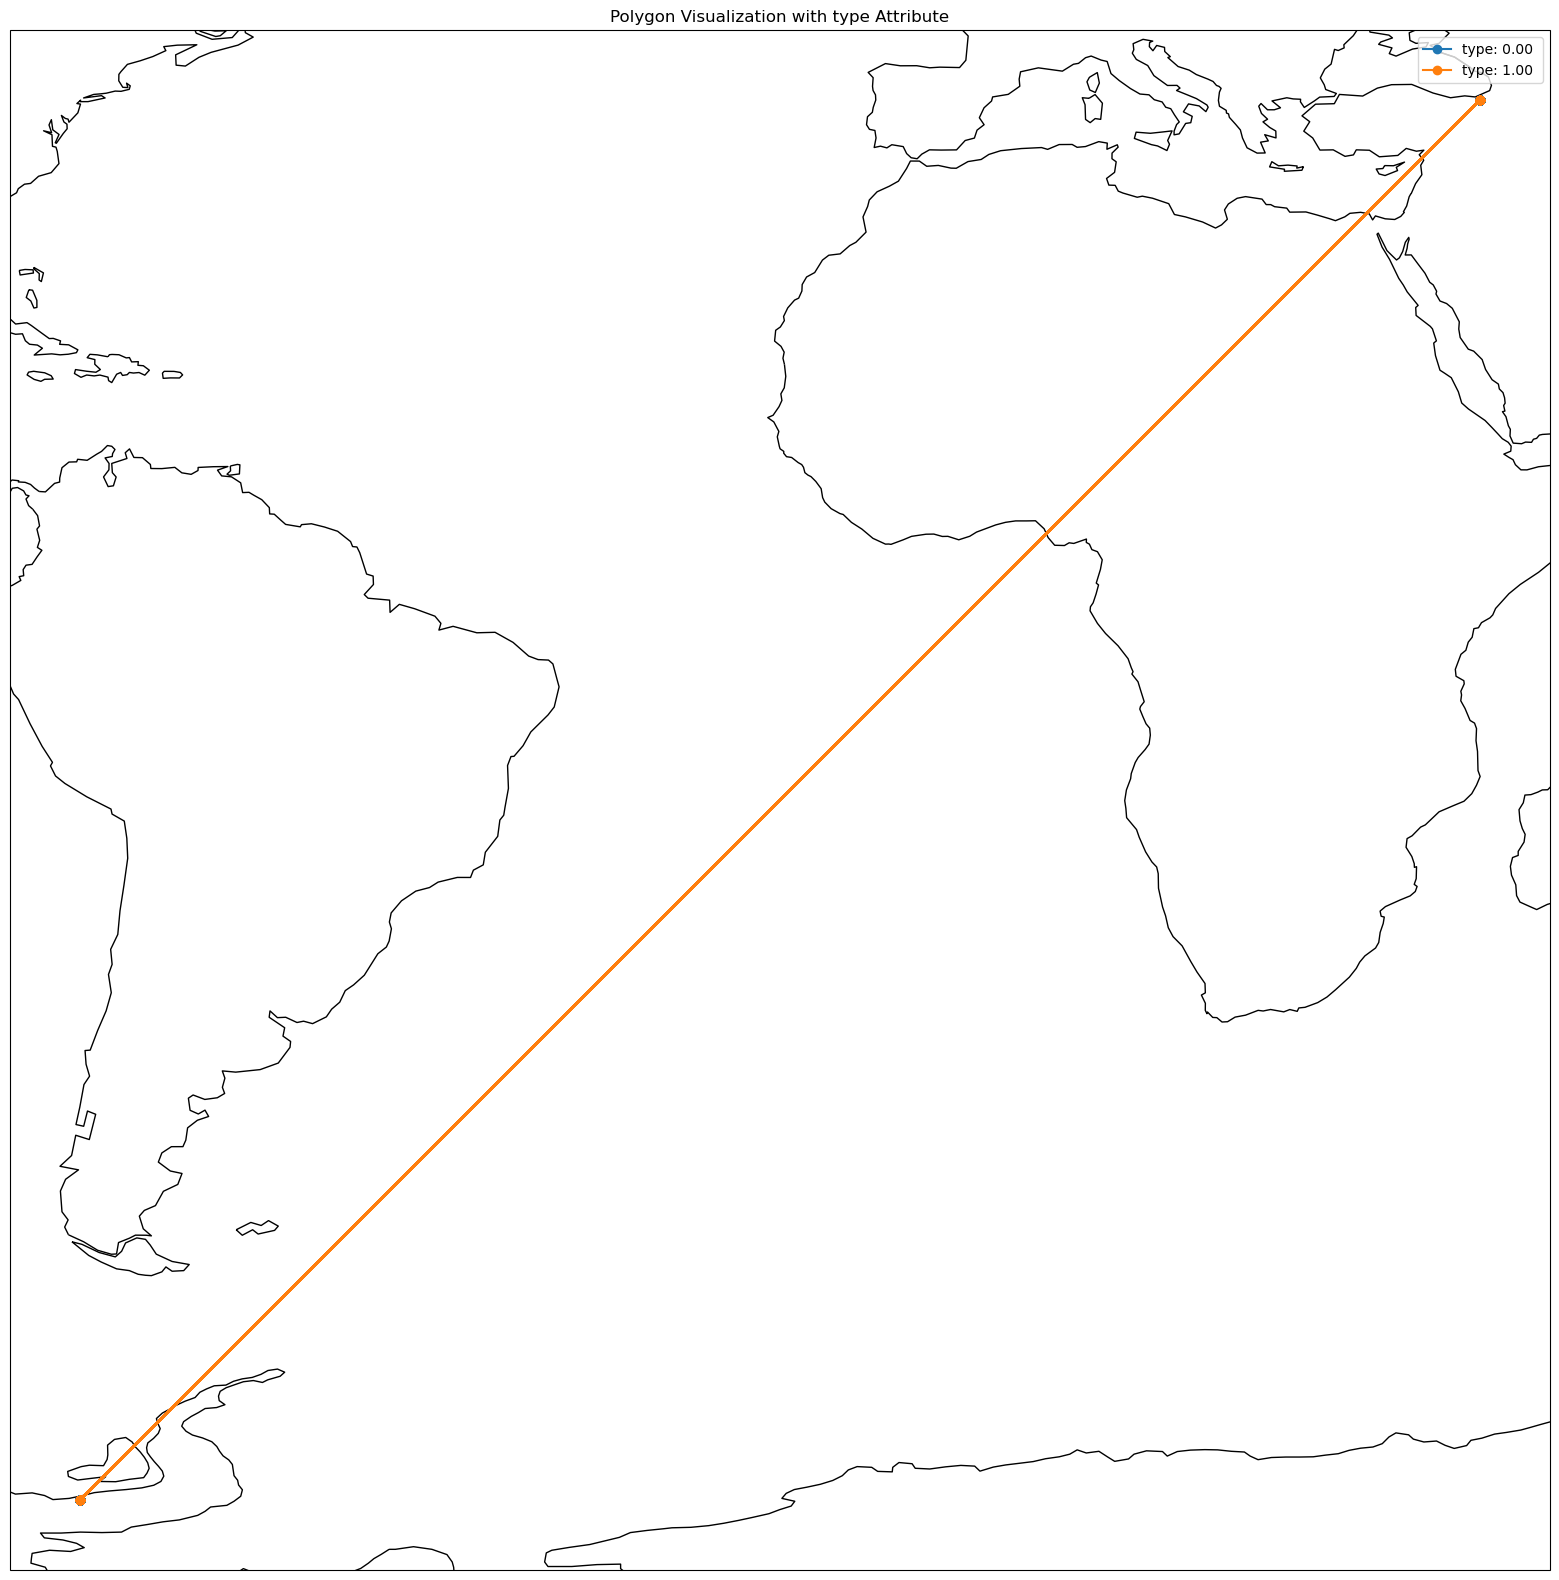

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset


nc_file = Dataset('shapefile_to_netcdfcombine.nc', 'r')


latitudes = nc_file.variables['polygons'][:, :, 1]
longitudes = nc_file.variables['polygons'][:, :, 0]
type_data = nc_file.variables['type'][:]


fig, ax = plt.subplots(figsize = (20,20),subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.set_title('Polygon Visualization with type Attribute')


for i in range(len(type_data)):
    # Extract the non-zero coordinates
    lons = longitudes[i, :]
    lats = latitudes[i, :]
    non_zero_mask = lons != 0
    lons = lons[non_zero_mask]
    lats = lats[non_zero_mask]

    
    ax.plot(lons, lats, marker='o', transform=ccrs.PlateCarree(), label=f'type: {type_data[i]:.2f} ')

plt.legend()
plt.show()


nc_file.close()
